# Visualizations for Presentation
-----
A couple presentation visualizations - you can mainly disregard this notebook

In [1]:
library(ggplot2)
library(RSQLCipher)
suppressWarnings(library(tidyverse))

suppressMessages(source("../../src/income.R"))


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
Sys.setenv("SQL_KEY"=Sys.getenv("HOT_KEY"))
db_path = "../../../db/hot-v3.db"
trips_2pct <- load_table(db_path, "trips_2pct")
trips_linked <- load_table(db_path, "trips_linked")


In [3]:
hov_count <- trips_linked %>%
    group_by(is_hov) %>% 
    mutate(is_hov = ifelse(toll == 0, 1, 0)) %>%
#     ifelse(toll = 0, mutate_each(funs(replace(is_hov, NA, 1)))) %>%
    summarize(hov_count = n()) %>%
    execute 

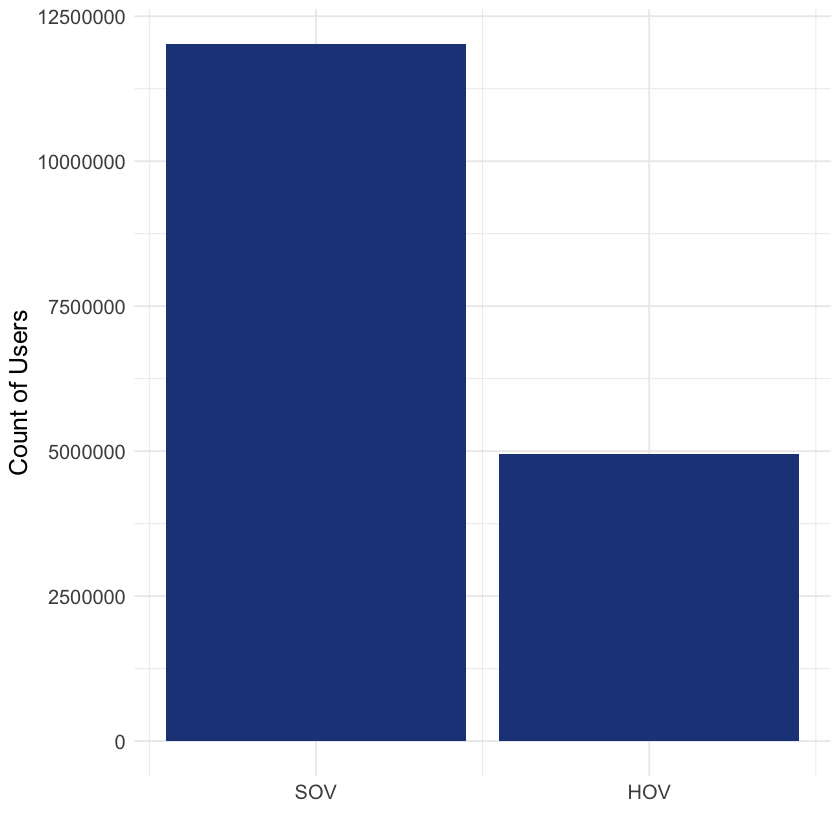

In [4]:
ggplot(hov_count, aes(x = is_hov, y= hov_count, )) +
    geom_bar(stat = "identity", fill = "#224488") +
    theme_minimal() +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = c(0,1),
                     labels = c("SOV", "HOV")) +
    ylab("Count of Users") +
    xlab("")

In [5]:
income_hov <- tibble(is_hov = c(0,1,2), income = c(102000, 94000, 0)) %>%
ggplot(aes(x = is_hov, y = income)) +
    geom_hline(yintercept = 84242, color = "darkgrey", linetype = "dashed") +
    geom_bar(stat = "identity", fill = "#224488") +
    theme_minimal() +
    theme(text = element_text(size = 15),
          axis.text.y=element_blank(),
         axis.title.y=element_blank(),
         panel.grid.major = element_blank(),
         panel.grid.minor= element_blank()) +
    scale_x_continuous(breaks = c(0,1,2),
                     labels = c("SOV", "HOV", " ")) +
    labs(title = "Income by Mode of HOT Lane Use") +
    xlab("") +
    geom_text(color = "white", aes(label = c("$102,000", "$94,000", "")), nudge_y = -6000, size = 5) +
    geom_text(color = "darkgrey", aes(label = " Median Income,\n King & Snohomish counties"), x = 2.25, y = 91000, hjust = "right")

    ggsave(filename = "../../../figures/income_hov.png", height = 5, width = 10, plot = income_hov)

In [6]:
entry_gate_vol <- trips_linked %>%
    group_by(entry_plaza) %>%
    summarize(entries = n()) %>%
    execute


exit_gate_vol <- trips_linked %>%
    group_by(exit_plaza) %>%
    summarize(entries = n()) %>%
    execute

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

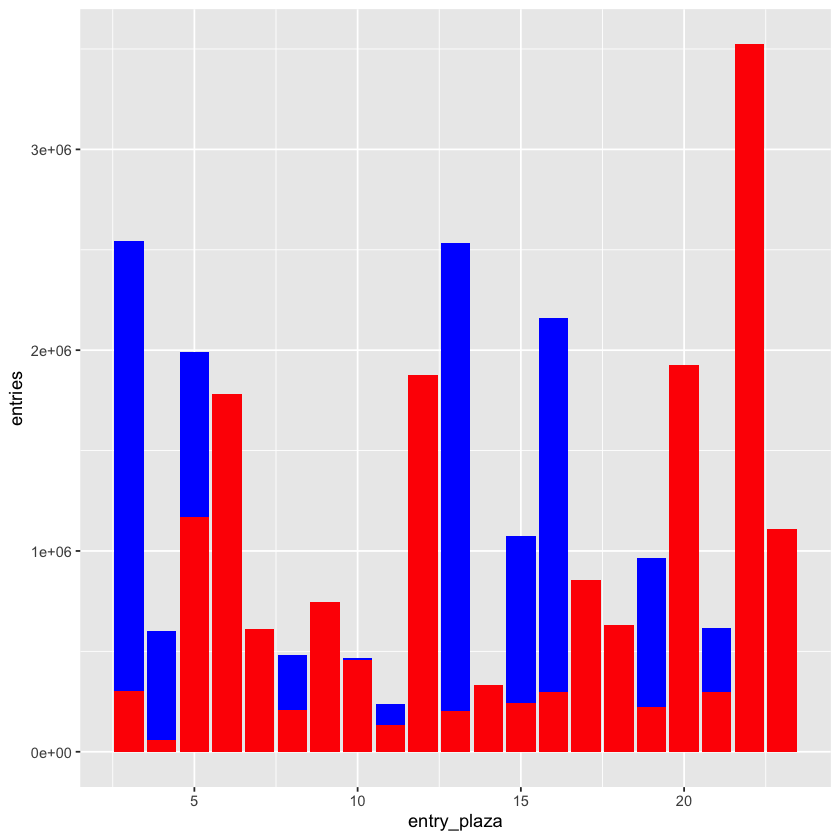

In [10]:
ggplot() +
    geom_histogram(data = entry_gate_vol, aes(x = entry_plaza, y = entries), stat = "identity", fill= "blue") +
    geom_histogram(data = exit_gate_vol, aes(x = exit_plaza, y = entries), stat = "identity", fill= "red") +
    

In [13]:
head(entry_gate_vol)
head(exit_gate_vol)

entry_plaza,entries
<dbl>,<dbl>
3,2546008
4,603872
5,1988940
6,795500
7,22107
8,479621


exit_plaza,entries
<dbl>,<dbl>
3,303676
4,58581
5,1170562
6,1779657
7,609034
8,209424
